# Part 1. What is machine learning? Why use scikit-learn for machine learning?

## What is machine learning?
* everday examples:
  - email spam filter
  - Netflix or Spotify recommendations
* "gives computers ability to learn without being programmed"
  --Arthur Samuel, inventor of the term "machine learning" and pioneering researcher
* automates tasks for which it would be tedious or just imposible to write imperative code
  - examples above ~ tedious
  - games, such as chess ~ mostly impossible
* So if we program a computer with machine learning, it should do two things:
  1. let the computer make decisions **without explicit rules**
  2. **generalize** so that it still makes correct decisions 

## Broad categories of machine learning
    
1. Supervised Learning
   - Classification
       common algorithms: k-nearest neighbors, support vector machine, random forests
   - Regression
2. Unsupervised Learning
   - Clustering
   - Dimensionality Reduction
3. Reinforcement Learning

## Machine learning is just modeling

* ML algorithms generate a **model** $y = f(x)$
    - you **"train"** the model with data you’ve seen and an **algorithm** that generates the model
    - then you **predict** based on new data points

## Types of supervised learning: regression

In this tutorial we will focus on supervised learning. These algorithms are the best understood in the field of machine learning and are the most commonly used in practical applications.

Scientists tend to think of linear regression as a way to show a relationship between two variables.

But a linear regression also functions as a model that makes predictions.

To emphasize that machine learning is just modeling, I will walk through the process of fitting a linear regression model using scikit-learn. This allows me to introduce the scikit-learn API as well.

In [1]:
# generate some fake data
from sklearn.datasets.samples_generator import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(random_state=42)
# split fake data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X[1,:].reshape(-1,1), y, test_size=0.33, random_state=42)

In [2]:
# import model class
from sklearn import linear_model

# instantiate model, i.e., create linear regression object
regr = linear_model.LinearRegression()

# fit the model, i.e., train using the training sets
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3]:
# tell notebook to show plots inline instead of opening in a separate window
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
seaborn.set_style("darkgrid", {"legend.frameon": "True"})

If we pick a point on the x axis for which we do not have data, our model gives us a predicted value $\hat{y}$ for that point

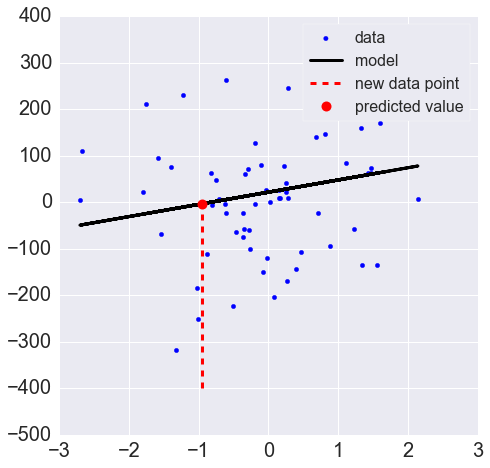

In [4]:
plt.figure(figsize=(7.5,7.5))
p1 = plt.scatter(X_train, y_train, color='blue',label='data')
p2, = plt.plot(X_train, regr.predict(X_train), color='black',
         linewidth=3,label='model')
y_hat = regr.predict(X_test[0,0])
p3, = plt.plot((X_test[0,0],X_test[0,0]),(plt.ylim()[0],y_hat),'r--',linewidth=3,label='new data point')
p4, = plt.plot(X_test[0,0],y_hat,'ro',markersize=10,label='predicted value')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend([p1,p2,p3,p4],('data','model','new data point','predicted value'),fontsize=16);

**So what?**

Bear in mind that machine learning algorithms let you can do this with 100s of observations per label instead of just one

## Types of supervised learning: classification

In classification, the $y$ values in our training data set are not continuous values.

Instead, each training sample $x$ will have a label $y$ that belongs to a set of **classes**.

Below is another fake data example.

This data has two classes: pink dots and brown dots.

The support vector machine (who we will meet again later) is an algorithm that finds a dividing line (solid black line) that maximizes the margin (dashed black line) between two groups.

It represents all those lines with just the data points that fall on them. Those data points are the support vectors.

Anything that falls in the area above the top dashed line will be classified in the 'pink dot' class, while anything below the bottom dashed line will be classified as belonging to the 'brown dot' class.

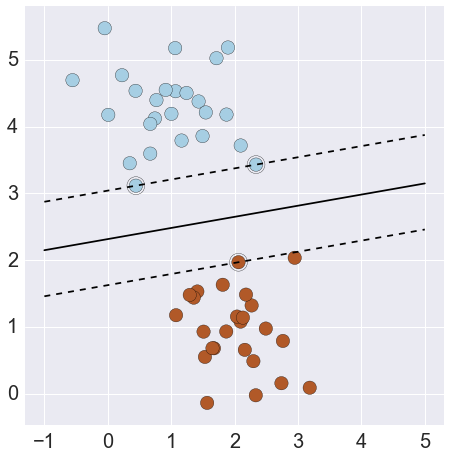

In [5]:
from fig_code import plot_svm_separator
plot_svm_separator()

Again, the example above looks like something we could do by eye.

But when each data point is a vector with thousands of features, we can't easily draw a line between groups.

But a machine learning algorithm often can.

## What is scikit-learn and why should I use it?

[Scikit-Learn](http://scikit-learn.org/stable/index.html):
 * Python package
 * provides access to well-known machine learning algorithms via Python code
 * through a clean, well-thought-out API
 * as opposed to you trying to install research code written in different low-level languages and then figuring out how to use it
 * built upon Python's NumPy (Numerical Python) and SciPy (Scientific Python) libraries
 * not specifically designed for extremely large datasets

## Representation of data in machine learning and scikit-learn

Recall that we are creating a model, $y = f(x)$.

Specifically, when we train a supervised learning algorithm for classification:
 - we train that model with **data** $x$ and **labels** $y$.
 - we want to be able to enter some new data $x$ in our model $f()$ and predict the correct label $y$.

**Data** $x$ will take the form of 2-d matrix.

Since scikit-learn is built on top of the numpy package, it uses numpy $n$-dimensional arrays to represent data.

In numpy, we can get the number of rows and columns from the `shape` property of an array.

Like so:

`>>>number_of_rows, number_of_columns = X.shape`

where:
 - `number_of_rows` = number of **samples**, i.e., discrete items you’re interested in looking at
   * e.g. if you were classifying images, each image would be a sample

 - `number_of_columns` = number of **features**
   * where each features is an observation/measurement you have for every sample

The scikit-learn API expects your **labels** $y$ to be in the form of a 1-dimensional array.

## Example: the iris dataset

"The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper *The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis*. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus"  -- [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)

<img src="./images/iris_setosa.jpg",style="height: 250px; display: inline;"/>
<img src="./images/iris_versicolor.jpg",style="height: 250px; display: inline;"/>
<img src="./images/iris_virginica.jpg",style="height: 250px; display: inline;"/>

(left to right: Iris Setosa, Versicolor, and Virginica)

The Iris dataset comes with scikit-learn. We can load it with the `load_iris` function in the `datasets` module.

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys()) # iris is basically a Python dictionary

dict_keys(['DESCR', 'target', 'target_names', 'data', 'feature_names'])


In [7]:
n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 150
Number of features: 4


So, again, the iris data is just a matrix, like so:
    
$$\mathbf{X} = \begin{bmatrix}
    x_{1}^{(1)} & x_{2}^{(1)} & x_{3}^{(1)} & \dots  & x_{4}^{(1)} \\
    x_{1}^{(2)} & x_{2}^{(2)} & x_{3}^{(2)} & \dots  & x_{4}^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{1}^{(150)} & x_{2}^{(150)} & x_{3}^{(150)} & \dots  & x_{4}^{(150)}
\end{bmatrix}.
$$

(The superscript denotes the *i*th row/sample, and the subscript denotes the *j*th feature/column, respectively.)

** what are the features? **

<img src="./images/iris_petal_sepal.png" ,style="height: 300px; display: inline;"/>

In [8]:
print(iris['feature_names'])
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print('Feature values for the first sample in the data set:')
for name, value in zip(iris['feature_names'],iris.data[0]):
    print('{}: {}'.format(name,value))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature values for the first sample in the data set:
sepal length (cm): 5.1
sepal width (cm): 3.5
petal length (cm): 1.4
petal width (cm): 0.2


#### Scale your data!

Notice that all these features have the same units and are the same order of magnitude. That's not typically the case!

Different scales for different features can cause problems. For example, if one of the features you're measuring has values that are all orders of magnitude larger than the others, it may appear to do a better job of separating the classes. But if you transform the data in some way so that all the features are on the same order of magnitude, it might turn out that other features or combinations of features do a better job of separating classes.

This is why it's almost always a good idea to **scale** your data.

A typical approach to scaling is to subtract the mean of every feature so that the values are centered around 0, and then divide by the standard deviation. Basically you're converting values to z-scores.

scikit-learn has a convenience function that does this for you:

`sklearn.preprocessing.scale`

It's also really important that you transform your **testing** data **with the means and standard deviations from your *training* data**.

Luckily scikit-learn makes this easy as well.

The `preprocessing` module includes a `StandardScaler` class that you can `fit` just like you fit estimators in scikit-learn.
After you `fit`, you then `transform`.

```Python
from sklearn.preprocessing import StandardScaler

sclr = StandardScaler()
sclr.fit(X_train)
X_train_scaled = sclr.transform(X_train)
# you can do the above two lines in one step with `fit_transform()`
X_test_scaled = sclr.transform(X_test)
```

You can read [more about scaling](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) in the scikit-learn docs.

#### labels and classes

Remember that **labels** should take the form of a 1-d vector:

In [ ]:
iris['target'].shape

Notice also that scikit-learn expects your class labels to be integers.

It is not set up to deal with labels as strings.

In [9]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


So you'll need some variable that maps from integers to class names.

For example, a list where the indices are the integers you use to represent each class.

I.e., if I represent the class 'setosa' with integer `0` then I should have `target_names[0] = 'setosa'`

In [10]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


** It is always a good idea to plot your raw data. **

** *Especially before you spend months trying to apply a machine learning algorithm to it!!!* **

Let's plot the iris dataset.
It's four dimensional but we can visualize two dimensions at a time with a scatter plot:

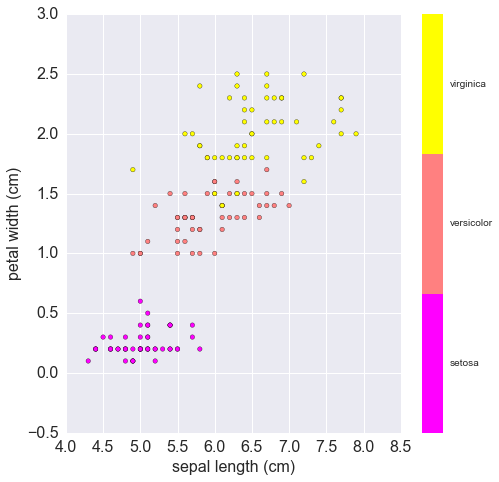

In [13]:
import numpy as np

x_index = 0
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(7.5,7.5))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('spring', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(iris.feature_names[x_index],fontsize=16)
plt.ylabel(iris.feature_names[y_index],fontsize=16);

## the scikit-learn API

Python is an **object-oriented** language.

Remember / know that in object-oriented languages, we create **"classes"** of objects that have certain **methods** and **properties**, and we can then make **instances** of those class, usually by assigning the class to a variable.

In scikit-learn, each type of model/algorithm is a class.

Let me generate some more fake data so I can demonstrate the basic steps you'll follow every time you use scikit-learn.

In [15]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                      random_state=0, cluster_std=0.60)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

The basic outline for using a scikit-learn estimator:

1.Import the model class

In [16]:
from sklearn.svm import SVC

2.Instantiate the class

In [18]:
regr = SVC()

(By `print`ing the model, we can inspect its properties. Those properties include the **hyperparameters** that dictate how the algorithm uses the training data)

In [19]:
print(regr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


3.You fit the model

In [22]:
regr.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

After you fit a model object with data, it will have new properties.

Those properties are the parameters of the model.

(By convention, the names of the properties added after a fit all end with an underscore.)

For example, after fitting a support vector machine, it will have the property `support_vectors_`.

In [23]:
regr.support_vectors_

array([[-0.04749204,  5.47425256],
       [ 1.89593761,  5.18540259],
       [-0.55552381,  4.69595848],
       [ 2.09680487,  3.7174206 ],
       [ 0.44359863,  3.11530945],
       [ 2.94821884,  2.03519717],
       [ 2.73890793,  0.15676817],
       [ 1.07714851,  1.17533301],
       [ 2.06156753,  1.96918596],
       [ 1.56737975, -0.1381059 ]])

4.You predict new y values, given new x values

In [24]:
y_pred = regr.predict(X_test)

In [25]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

### Review: the scikit-learn estimator interface

Scikit-learn strives to have a uniform interface across all methods.

Given a scikit-learn *estimator* object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.